Final Project Notebook

In [43]:
import pandas as pd
import numpy as np
import fileinput as fi
import matplotlib.pyplot as plt
%matplotlib inline

#Parameters for building master matrix
gyro_freq = 66 #Hz
robot_iter = "EP2-"
robot_serial = {'0066':0, '0140':1, '0252':2, '0379':3, '0437':4, '0515':5, '0688':5, '0763':6, '0769':7, '1396':8,
                '1716':9, '1893':10, '2299':11, '2389':12}
data_type = '.csv'
surfaces = {'carpet_03': 0, 'carpet_04': 1, 'carpet_06': 2, 'carpet_07': 3, 'carpet_08': 4, 'hardwood_02': 5, \
            'hardwood_03': 6, 'linoleum_03': 7, 'rubber_01': 8, 'tatami_02': 9, 'tile_03': 10, 'tile_04': 11, \
            'under_01': 12}
index = []

#Instantiating lists to assemble master matrix 
robot_list =[]
file_names = []
list_master = []
#Create list of discrete csv's and read them into one dataframe
for robot in robot_serial:
    robot_list.append("EP2-" + robot)    
for file_name in robot_list:
    file_names.append(file_name + '.csv')    
for entry in file_names:
    list_master.append(pd.read_csv(entry))

In [44]:
df_master = pd.concat(list_master, axis = 1)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40483 entries, 0 to 40482
Columns: 182 entries, 0 to 0.12
dtypes: float64(169), int64(13)
memory usage: 56.5 MB


In [45]:
#create gyro sample freq. based index
index = np.arange(0,((gyro_freq)**-1)*len(df_master),gyro_freq**-1)

print index
print len(index)

[  0.00000000e+00   1.51515152e-02   3.03030303e-02 ...,   6.13333333e+02
   6.13348485e+02   6.13363636e+02]
40483


#Relabel columns with correct robot serials
col_names = []
for ser_num in robot_serial:
    col_names.append(ser_num)
    
df_master.columns = col_names
df_master.head()

In [72]:
#set index of dataframe to time stamp and look at the matrix
df_master.set_index(index, inplace=True)
#df_master.dropna()
df_master.head(25)
#print df_master

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12
0.000000,0,0,0,0,303,0,0,0,0,0,...,0,0,0,-208,0,0,0,0,0,0
0.015152,0,0,0,0,573,0,0,0,0,0,...,0,0,0,-208,0,0,0,0,0,0
0.030303,-339,0,0,0,573,0,0,0,0,0,...,0,0,0,-208,0,0,0,0,0,0
0.045455,-339,0,0,0,573,0,0,0,0,0,...,0,0,0,-208,0,0,0,0,0,0
0.060606,-339,0,0,0,557,0,0,-178,0,0,...,0,0,0,-208,0,0,0,0,0,0
0.075758,-339,0,0,-109,557,0,0,-178,0,0,...,0,0,0,-208,0,0,0,0,0,0
0.090909,-339,0,0,-109,557,0,0,-178,0,0,...,0,0,0,-206,0,0,0,0,0,0
0.106061,-339,0,0,-109,599,0,0,-178,0,0,...,0,0,0,-206,0,0,0,0,0,0
0.121212,0,0,0,0,599,0,0,-178,0,0,...,0,0,0,-206,0,0,0,0,0,0
0.136364,0,0,0,0,599,21,0,-178,0,0,...,0,0,0,-206,0,0,0,0,0,0


In [67]:
#list of flooring surfaces for first draft
first_floors = ['hardwood_02', 'hardwood_03', 'carpet_03', 'carpet_04']

In [49]:
#function to return list of addresses given a surface type 
def col_address(col_name):
    addresses = []
    collumn = surfaces[col_name]
    addresses.append(collumn)
    for surface in surfaces:
        new_col = collumn + len(surfaces)
        addresses.append(new_col)
        collumn = new_col
    return addresses

#Column address list function test
col_address('linoleum_03')

[7, 20, 33, 46, 59, 72, 85, 98, 111, 124, 137, 150, 163, 176]

In [50]:
#Function to generate table, given a flooring surface
def surf_table(surface):
    df_gen = df.iloc[:,col_address(surface)]
    return df_gen

for i in first_floors:
    #gen = surf_table(i)
    print i

hardwood_02
hardwood_03
carpet_03
carpet_04


In [51]:
#Generate 2x hardwood and 2x carpet tables
df_hardwood02 = df_master.iloc[:20000,col_address('hardwood_02')] 
df_hardwood03 = df_master.iloc[:20000,col_address('hardwood_03')]
df_carpet03 = df_master.iloc[:20000,col_address('carpet_03')]
df_carpet04 = df_master.iloc[:20000,col_address('carpet_04')]

df_hardwood02.head()
df_hardwood03.head()


,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
0.000000,0,0,0,0,0,0,0,0,25,0,0,0,0,-208
0.015152,0,0,0,94,0,0,0,0,25,0,0,0,0,-208
0.030303,0,0,0,94,0,0,0,1678,25,0,1578,0,0,-208
0.045455,0,0,0,94,0,0,0,1678,25,0,1578,0,0,-208
0.060606,0,0,0,94,0,0,0,1678,25,0,1578,0,0,-208


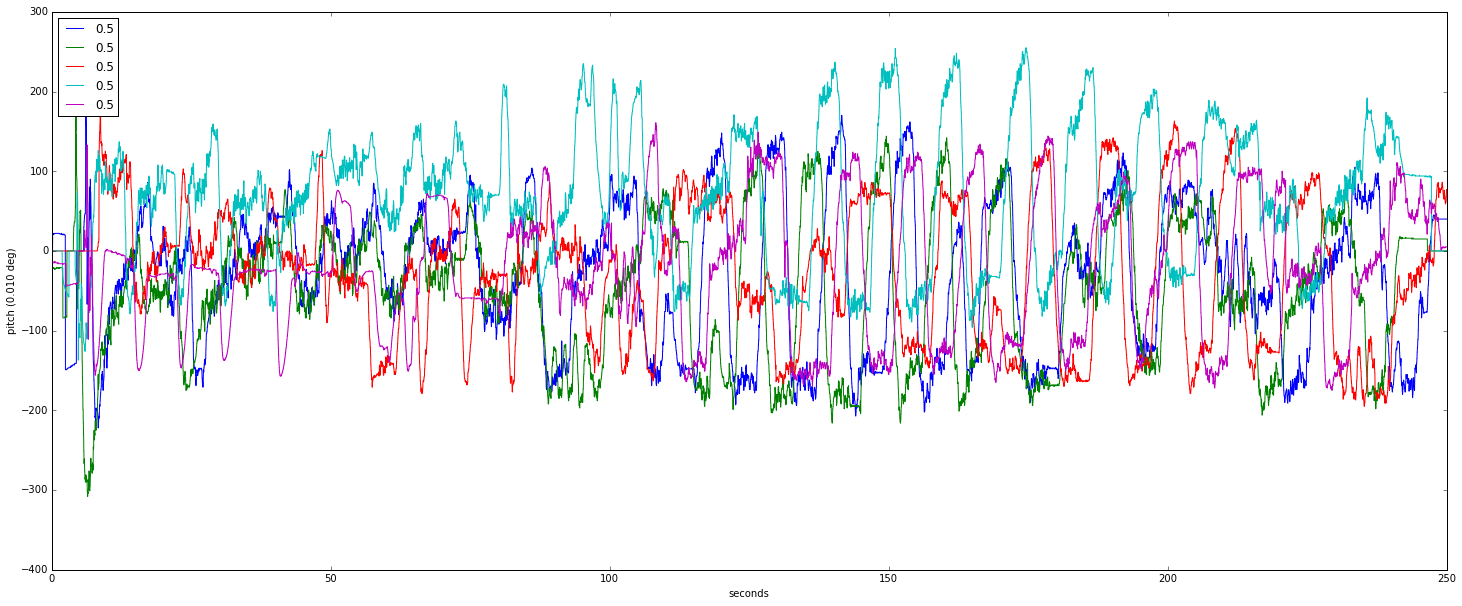

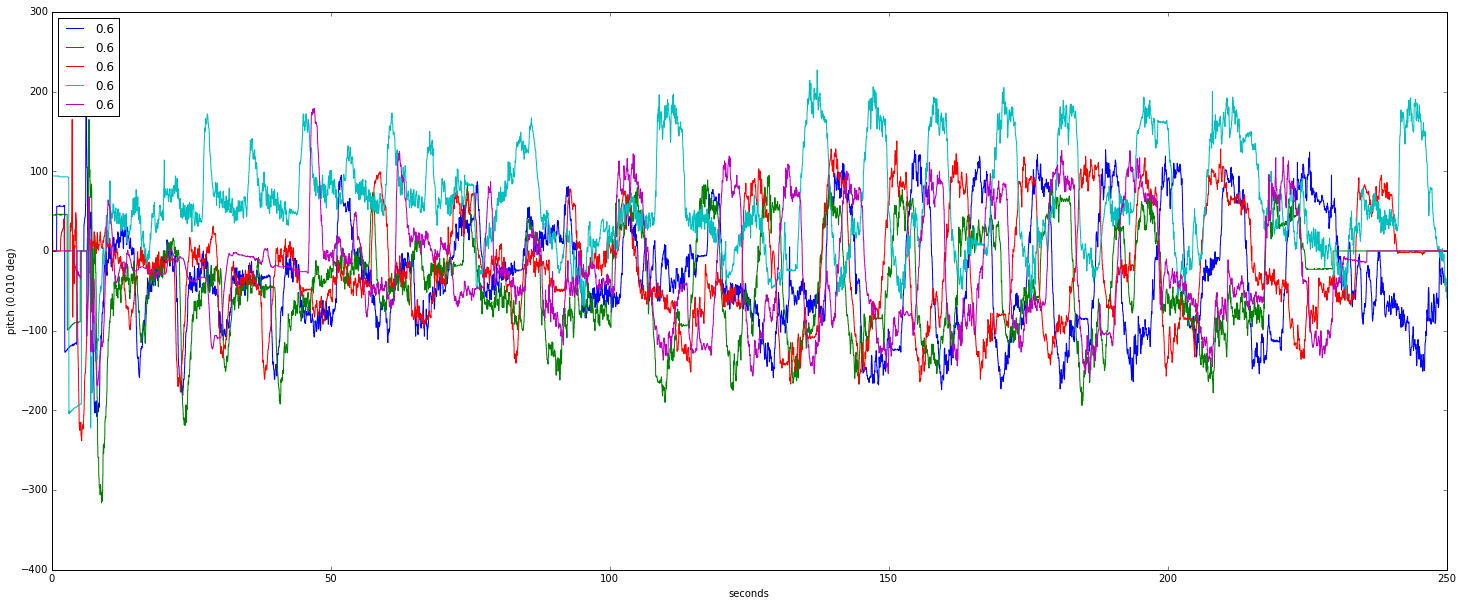

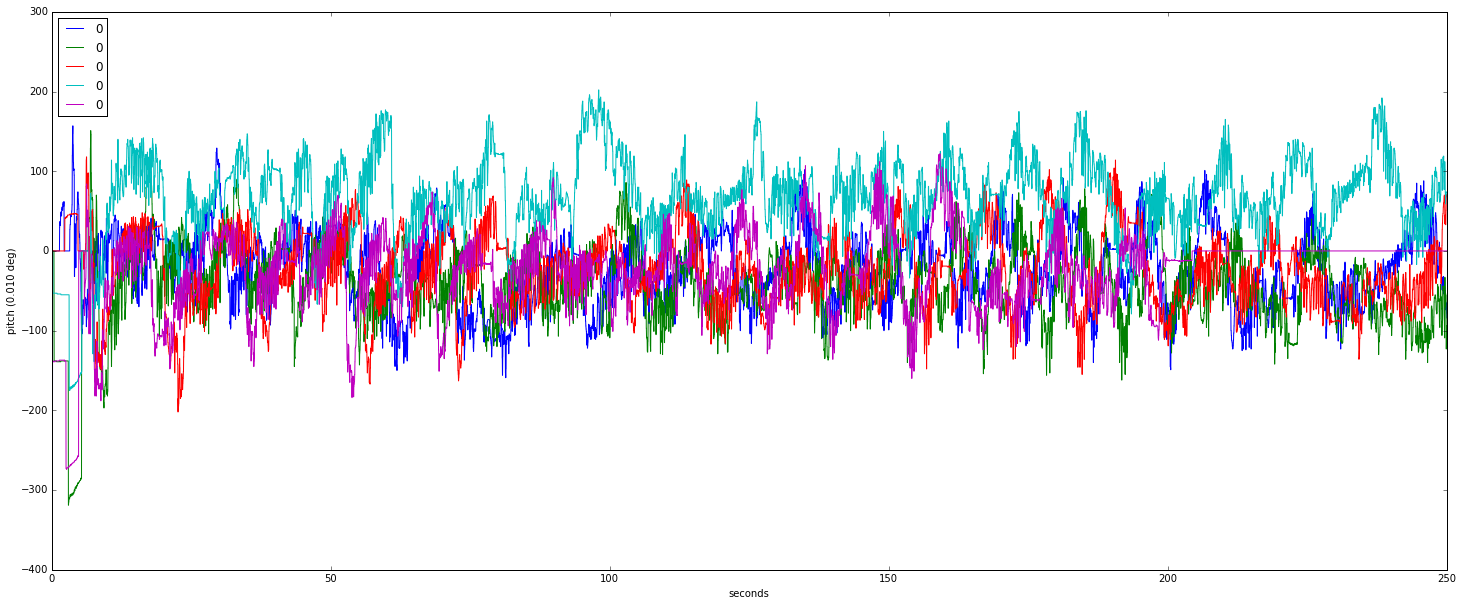

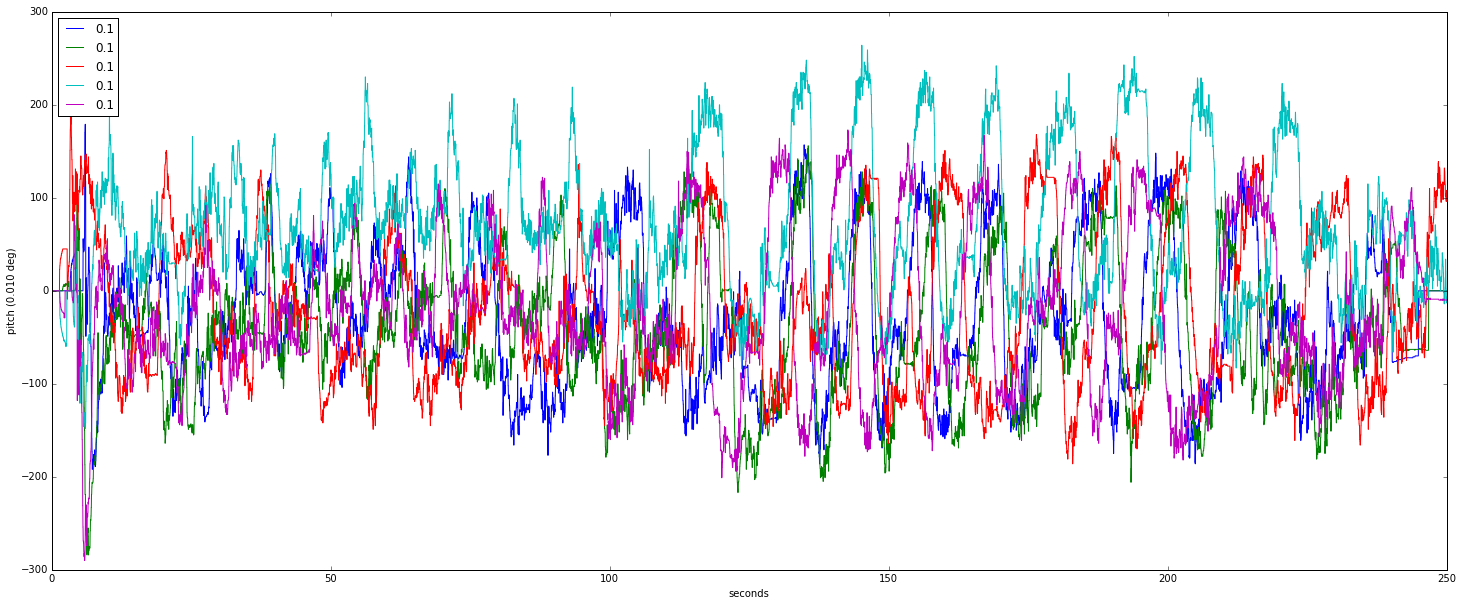

In [80]:
#Generate plot of 5 robots of each flooring type
floors_df = [df_hardwood02, df_hardwood03, df_carpet03, df_carpet04]
    
def gen_series_plot(df,series):
    df.ix[:250.0,:series].plot(figsize = (25,10))
    plt.xlabel('seconds')
    plt.ylabel('pitch (0.010 deg)')
    plt.legend(loc = 'upper left')
    

for i in floors_df:
    gen_series_plot(i, 5)

Window: 10 sec


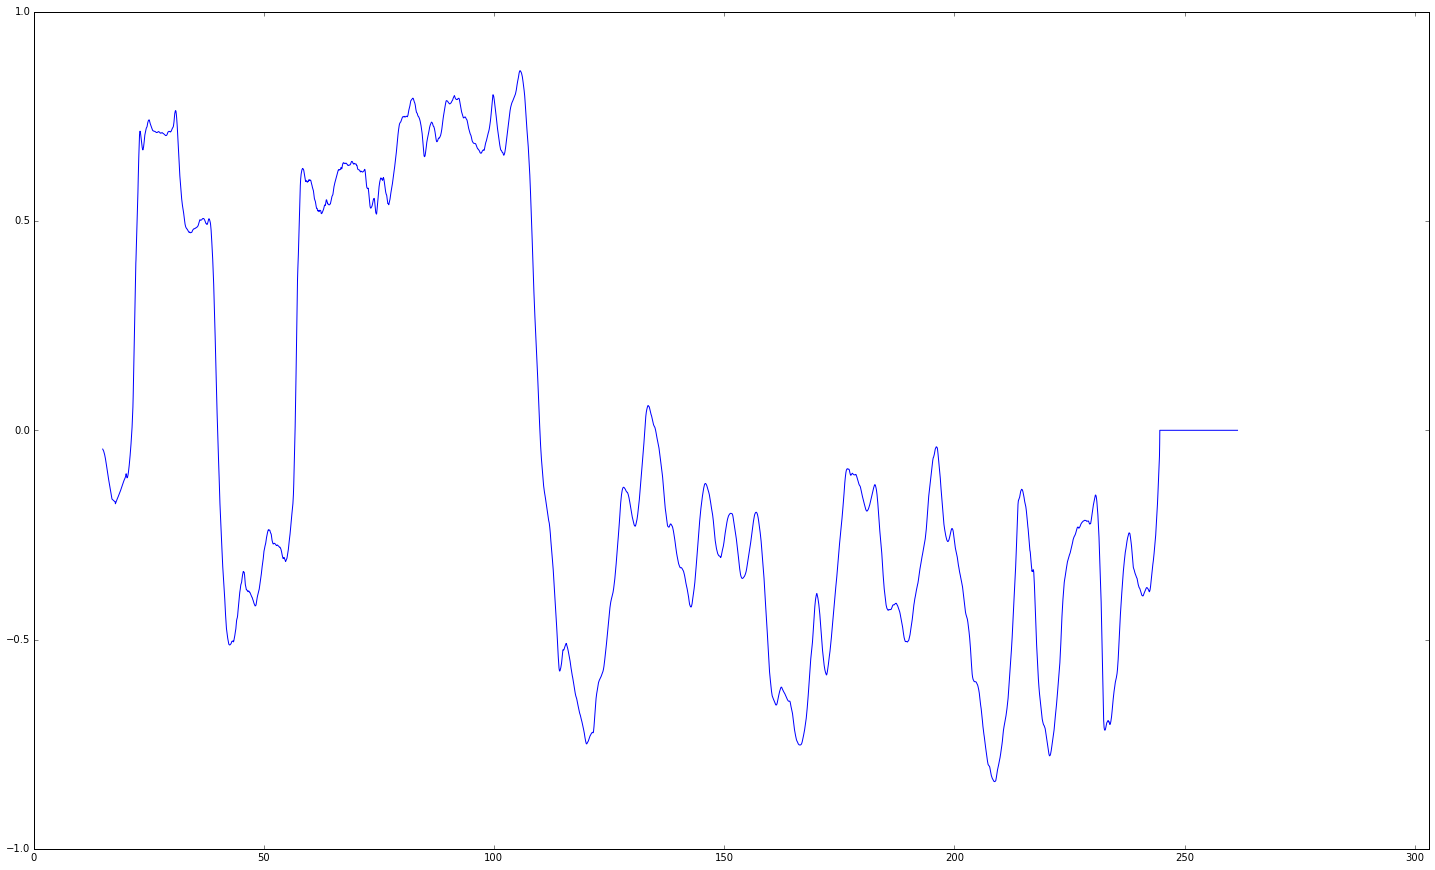

In [100]:
#Function to meausure and plot rolling correlation between 2 series
series_1 = df_hardwood03.iloc[:,1]
series_2 = df_hardwood02.iloc[:,1]
window = gyro_freq*(60/6)
def rolling_corr(series_1,series_2,window):
    pd.rolling_corr(series_1,series_2,window)
    corr.plot(figsize = (25,15))
    
print('Window: ' + str(window/gyro_freq) + ' sec')
rolling_corr(series_1,series_2,gyro_freq*(60/5))
#df_1 = pd.DataFrame(df_hardwood03.iloc[:,:1])
#corr = df_1.corr("pearson")

In [54]:
#Load KMeans Class
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2, init='random', n_init=1, max_iter = 300, random_state = 1)

In [55]:
#Aggregate data into single matrix
df_train = pd.concat([df_hardwood02,df_hardwood03,df_carpet03,df_carpet04], axis = 1)
df_train.head()

,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
0.000000,0,-22,0,0,0,-47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.015152,0,-22,0,0,0,-47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.030303,0,-22,0,0,-15,-47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.045455,0,-21,0,0,-15,-47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.060606,0,-21,0,0,-15,-47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#Drop NaNs
df_train.dropna()
df_train.info

<bound method DataFrame.info of             0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5 ...   0.1  0.1  \
0.000000      0  -22    0    0    0  -47    0    0    0    0 ...     0    0   
0.015152      0  -22    0    0    0  -47    0    0    0    0 ...     0    0   
0.030303      0  -22    0    0  -15  -47    0    0    0    0 ...     0    0   
0.045455      0  -21    0    0  -15  -47    0    0    0    0 ...     0    0   
0.060606      0  -21    0    0  -15  -47    0    0    0    0 ...     0    0   
0.075758      0  -21    0    0  -14  -46    0    0    0    0 ...     0    0   
0.090909      0  -21    0    0  -14  -46    0    0    0    0 ...     0    0   
0.106061      0  -21    0    0  -14  -46    0    0    0    0 ...     0    0   
0.121212      0  -21    0    0  -14  -46    0    0    0    0 ...     0    0   
0.136364     21  -21    0    0  -14  -45    0    0    0    0 ...     0    0   
0.151515     21  -22    0    0  -14  -45    0    0    0    0 ...     0    0   
0.166667     21  -22

In [57]:
#train the classifier on the master_matrix subset
km.fit(df_train)

KMeans(copy_x=True, init='random', max_iter=1, n_clusters=4, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [58]:
y = km.predict(df_train)
len(y)

20000

Originally, I thought KMeans, as an unsupervised method, would serve best for this dataset given the variety of data I have to train on, but it looks like its intolerance to outliers and high dimensionality, without additional distance metrics makes it a poor choice.

To potentially increase floortype to floortype variation to better differenciate, I want to try to use the FFT of the signal to see if there is a fundamental difference between signals.  

In reading more on classifying time series, I will build DWT-based model in future iterations as it will better represent the data in both time AND frequency domains.

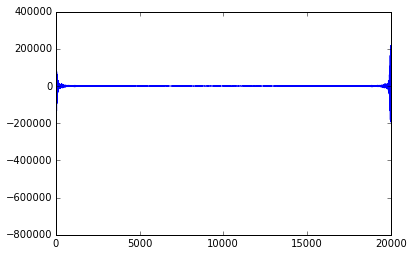

In [73]:
#Generate Fourier Transform of Signal to Identify Principle Frequencies
from scipy.fftpack import fft
#number of samples
n = len(df_hardwood02.iloc[:,0])
T = 1.0/1000.0
x = np.linspace(0.0,n*T,n)
y = df_hardwood02.iloc[:,1]
xf = np.linspace(0.0, 1/(2.0*T), n/2)
yf = np.fft.fft(y)
plt.plot(yf)
plt.show()

In [ ]:
#TO DELETE:
#test_surf = ('carpet_03', 'carpet_04', 'carpet_06', 'carpet_07', 'carpet_08', 'hardwood_02', 'hardwood_03', \
             #'linoleum_03', 'rubber_01', 'tatami_02', 'tile_03', 'tile_04', 'under_01')